### PPO AGENT:

#### Load the dataset and preprocess the dataframe in the required format.

Technical indicators created for the environment include:

- RSI
- MACD
- Stoch_k
- OBV
- Upper_BB
- ATR_1
- ATR_2
- ATR_5
- ATR_10
- ATR_20


1. RSI (Relative Strength Index): The Relative Strength Index (RSI) is a momentum oscillator that measures the speed and change of price movements. RSI oscillates between zero and 100. Traditionally, and according to Wilder, RSI is considered overbought when above 70 and oversold when below 30. This indicator helps traders identify potential reversal points based on the internal strength of the asset’s price movement.

2. MACD (Moving Average Convergence Divergence): A trend-following momentum indicator that shows the relationship between two moving averages of a stock’s price.
The MACD is calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA.

3. Stoch_k (Stochastic Oscillator %K): A momentum indicator comparing a particular closing price of a stock to a range of its prices over a certain period of time.
The sensitivity of the oscillator to market movements is reducible by adjusting that time period or by taking a moving average of the result.

4. OBV (On-Balance Volume): Uses volume flow to predict changes in stock price.
The idea is that volume precedes price movement, so if a stock is increasing in volume without a corresponding increase in price, the price is likely to follow, or vice versa.

5. Upper_BB (Upper Bollinger Band): Bollinger Bands are a type of statistical chart characterizing the prices and volatility over time of a financial instrument or commodity. The Bands consist of a middle band being a rolling mean, and two outer bands located at a distance that is a standard deviation away. This setup helps in identifying whether prices are high or low on a relative basis. They are particularly useful for finding periods of oversupply and undersupply, which can signal potential buying or selling opportunities.

6. ATR (Average True Range): A volatility indicator that measures how much an asset moves, on average, during a given time frame.
ATR_1, ATR_2, ATR_5, ATR_10, and ATR_20 likely refer to the ATR calculated over different time periods (e.g., 1 day, 2 days, 5 days, etc.).

In [ ]:
# Download TA-Lib
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib

# Compile and install
!./configure --prefix=/usr
!make
!make install

# Install the Python wrapper
!pip install TA-Lib

# Go back to the main directory
%cd ../


--2024-08-08 16:55:48--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-08-08 16:55:49--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://onboardcloud.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-08-08 16:55:49--  http://onboardcloud.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1

In [ ]:
!pip install stable-baselines3 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 46.3 MB/s eta 0:00:00


In [ ]:
!pip install "stable-baselines3[extra]>=2.0.0a4" -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 23.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.5 MB/s eta 0:00:00


### Momentum Indicators
- **RSI (Relative Strength Index)**: This tool helps us gauge the speed and changes in price movements. If RSI reads above 70, it suggests that the stock might be overbought, and readings below 30 indicate it could be oversold. This is based on a standard 14-day period.
- **MACD (Moving Average Convergence Divergence)**: This indicator helps track the momentum and trend of the stock by comparing two moving averages. It’s like watching two runners (a fast one and a slow one) to see who leads or lags, which can signal potential buying or selling opportunities.
- **Stochastic Oscillator (%K and %D)**: This tool checks if the stock is overbought or oversold by comparing its closing price to its price range over a certain period. It’s a bit like checking if today’s temperature is unusual for this time of year by comparing it to the historical range.

### Volume Indicators
- **OBV (On-Balance Volume)**: This indicator uses volume flow to predict changes in stock price, operating on the idea that shifts in volume can hint at future price movements. Think of it as listening to the crowd; a louder cheer might mean more action.

### Volatility Indicators
- **Bollinger Bands**: These bands help measure how wild or calm the market is. The stock price typically moves within an upper and lower boundary, which can help traders figure out when the stock might be stretching too far from its average.
- **Average True Range (ATR)**: This set of indicators shows how much a stock typically moves in a day, over various time frames (like comparing the range of temperature swings in a day versus a week or a month).

### Trend Indicators
- **ADX (Average Directional Index)**: This index measures how strong a trend is. A higher value means a stronger trend, whether the stock is moving up or down.
- **Directional Movement Indicators (+DI and -DI)**: These help point out which way the market is moving. +DI tracks upward trends, while -DI tracks downward trends, offering clues on potential market direction.
- **CCI (Commodity Channel Index)**: This tool spots cyclical trends in a stock’s price to understand how it moves within a particular cycle.

### Other Indicators
- **DLR (Daily Log Return)**: This measures how much the stock price changes each day, offering a more stable view of price movements.
- **TWAP (Time-Weighted Average Price)**: This gives an average price of the stock over time, smoothing out short-term fluctuations.
- **VWAP (Volume-Weighted Average Price)**: This is like TWAP but considers how much stock was traded at each price, helping to understand at what price most shares changed hands, thus offering a fairness gauge for traders.



In [ ]:
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt


class TechnicalIndicators:
    def __init__(self, data):
        self.data = data

    def add_momentum_indicators(self):
        self.data['RSI'] = ta.RSI(self.data['Close'], timeperiod=14)
        self.data['MACD'], self.data['MACD_signal'], self.data['MACD_hist'] = ta.MACD(self.data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
        self.data['Stoch_k'], self.data['Stoch_d'] = ta.STOCH(self.data['High'], self.data['Low'], self.data['Close'],
                                                              fastk_period=14, slowk_period=3, slowd_period=3)

    def add_volume_indicators(self):
        self.data['OBV'] = ta.OBV(self.data['Close'], self.data['Volume'])

    def add_volatility_indicators(self):
        self.data['Upper_BB'], self.data['Middle_BB'], self.data['Lower_BB'] = ta.BBANDS(self.data['Close'], timeperiod=20)
        self.data['ATR_1'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=1)
        self.data['ATR_2'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=2)
        self.data['ATR_5'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=5)
        self.data['ATR_10'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=10)
        self.data['ATR_20'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=20)

    def add_trend_indicators(self):
        self.data['ADX'] = ta.ADX(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=14)
        self.data['+DI'] = ta.PLUS_DI(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=14)
        self.data['-DI'] = ta.MINUS_DI(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=14)
        self.data['CCI'] = ta.CCI(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=5)

    def add_other_indicators(self):
        self.data['DLR'] = np.log(self.data['Close'] / self.data['Close'].shift(1))
        self.data['TWAP'] = self.data['Close'].expanding().mean()
        self.data['VWAP'] = (self.data['Volume'] * (self.data['High'] + self.data['Low']) / 2).cumsum() / self.data['Volume'].cumsum()

    def add_all_indicators(self):
        self.add_momentum_indicators()
        self.add_volume_indicators()
        self.add_volatility_indicators()
        self.add_trend_indicators()
        self.add_other_indicators()
        return self.data

In [ ]:
data = pd.read_csv('/content/xnas-itch-20230703.tbbo (1).csv')

# Preprocessing to create necessary columns
data['price']=data['price']/1e9
data['bid_px_00']=data['bid_px_00']/1e9
data['ask_px_00']=data['ask_px_00']/1e9

data['Close'] = data['price']
data['Volume'] = data['size']
data['High'] = data[['bid_px_00', 'ask_px_00']].max(axis=1)
data['Low'] = data[['bid_px_00', 'ask_px_00']].min(axis=1)
data['Open'] = data['Close'].shift(1).fillna(data['Close'])


ti = TechnicalIndicators(data)
df_with_indicators = ti.add_all_indicators()
market_features_df = df_with_indicators[35:]

In [ ]:
data.head()

,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,depth,price,size,...,ATR_5,ATR_10,ATR_20,ADX,+DI,-DI,CCI,DLR,TWAP,VWAP
0,1688371200660869841,1688371200660704717,1,2,32,T,B,0,194.12,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,194.120000,193.875000
1,1688371201201402566,1688371201201237816,1,2,32,T,B,0,194.11,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000052,194.115000,193.961667
2,1688371201233688992,1688371201233524761,1,2,32,T,B,0,194.11,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,194.113333,193.993182
3,1688371201317556361,1688371201317392163,1,2,32,T,B,0,194.11,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,194.112500,193.995000
4,1688371201478520666,1688371201478356044,1,2,32,T,B,0,194.00,7,...,NaN,NaN,NaN,NaN,NaN,NaN,-74.468085,-0.000567,194.090000,193.979250


Text(0.5, 1.0, 'AAPL')

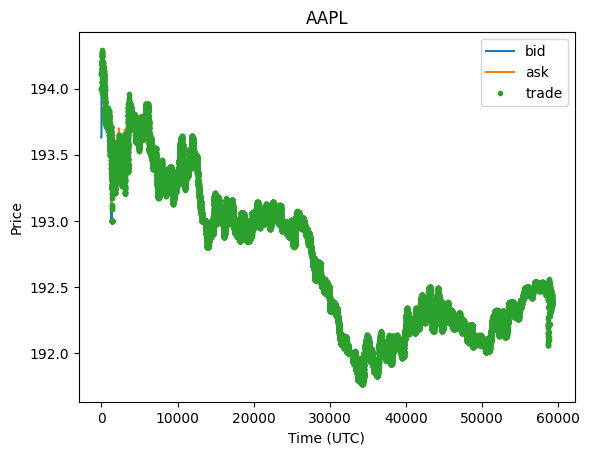

In [ ]:
plt.plot(data.bid_px_00, drawstyle="steps-post", label="bid")
plt.plot(data.ask_px_00, drawstyle="steps-post", label="ask")
plt.plot(data[data.action == "T"].price, linestyle="None", marker=".", label="trade")
plt.legend()
plt.xlabel("Time (UTC)")
plt.ylabel("Price")
plt.title("AAPL")


Checking the dataset:

In [ ]:
# Show all columns in pandas
pd.set_option('display.max_columns', None)

market_features_df.head(35)

,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,depth,price,size,flags,ts_in_delta,sequence,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_ct_00,ask_ct_00,symbol,Close,Volume,High,Low,Open,RSI,MACD,MACD_signal,MACD_hist,Stoch_k,Stoch_d,OBV,Upper_BB,Middle_BB,Lower_BB,ATR_1,ATR_2,ATR_5,ATR_10,ATR_20,ADX,+DI,-DI,CCI,DLR,TWAP,VWAP
35,1688371214386057385,1688371214385893078,1,2,32,T,N,0,194.05,50,130,164307,326232,194.00,194.30,3101,19,4,10,AAPL,194.05,50,194.30,194.00,194.05,54.544543,0.006271,-0.003130,0.009401,5.252525e+01,61.952862,-266.0,194.065621,194.0170,193.968379,0.30,0.175078,0.098615,0.075141,0.072403,97.257397,30.435801,0.196362,166.666667,0.000000,194.020000,194.021894
36,1688371214386063777,1688371214385899379,1,2,32,T,N,0,194.05,50,130,164398,326233,194.00,194.30,3101,19,4,10,AAPL,194.05,50,194.30,194.00,194.05,54.544543,0.007108,-0.001082,0.008190,3.838384e+01,52.525253,-266.0,194.068990,194.0200,193.971010,0.30,0.237539,0.138892,0.097627,0.083783,97.361721,22.989295,0.148320,83.333333,0.000000,194.020811,194.025188
37,1688371215804852019,1688371215804687301,1,2,32,T,B,0,194.21,10,130,164718,328131,194.00,194.21,3101,29,4,1,AAPL,194.21,10,194.21,194.00,194.05,85.890753,0.020446,0.003223,0.017223,4.040404e+01,43.771044,-256.0,194.125889,194.0305,193.935111,0.21,0.223770,0.153114,0.108864,0.090094,97.458593,19.409454,0.125224,79.268293,0.000824,194.025789,194.025596
38,1688371219671476629,1688371219671312224,1,2,32,T,N,0,194.14,10,130,164405,331406,194.00,194.16,3101,400,4,1,AAPL,194.14,10,194.16,194.00,194.21,64.827662,0.025079,0.007594,0.017484,4.949495e+01,42.760943,-266.0,194.142928,194.0375,193.932072,0.21,0.216885,0.164491,0.118978,0.096089,97.548546,16.622008,0.107240,-3.205128,-0.000360,194.028718,194.025873
39,1688371223368835585,1688371223368671235,1,2,32,T,B,0,194.13,10,130,164350,334235,194.00,194.13,3101,400,4,1,AAPL,194.13,10,194.13,194.00,194.14,62.470772,0.027625,0.011601,0.016025,5.757576e+01,49.158249,-276.0,194.155247,194.0440,193.932753,0.14,0.178442,0.159593,0.121080,0.098285,97.632074,15.068361,0.097216,-113.095238,-0.000052,194.031250,194.026071
40,1688371229849940201,1688371229849775570,1,2,32,T,B,0,194.13,100,130,164631,339055,194.01,194.13,101,390,2,1,AAPL,194.13,100,194.13,194.01,194.13,62.470772,0.029305,0.015141,0.014164,4.949495e+01,52.188552,-276.0,194.165821,194.0505,193.935179,0.12,0.149221,0.151674,0.120972,0.099370,97.709636,13.871534,0.089495,-64.102564,0.000000,194.033659,194.028188
41,1688371230451172473,1688371230451005195,1,2,32,T,N,0,194.02,10,0,167278,339547,194.01,194.16,101,400,2,1,AAPL,194.02,10,194.16,194.01,194.13,42.676806,0.021513,0.016416,0.005097,3.454545e+01,47.205387,-286.0,194.165390,194.0515,193.937610,0.15,0.149611,0.151339,0.123875,0.101902,97.793820,14.463498,0.080850,-113.425926,-0.000567,194.033333,194.028460
42,1688371230451172473,1688371230451005195,1,2,32,T,A,0,194.01,1,0,167278,339548,194.01,194.16,101,400,2,1,AAPL,194.01,1,194.16,194.01,194.02,41.392784,0.014365,0.016006,-0.001641,1.949495e+01,34.511785,-287.0,194.165066,194.0520,193.938934,0.15,0.149805,0.151071,0.126487,0.104307,97.871992,13.100725,0.073232,-90.909091,-0.000052,194.032791,194.028488
43,1688371230451172473,1688371230451005195,1,2,32,T,A,0,194.01,100,130,167278,339549,194.01,194.16,100,400,1,1,AAPL,194.01,100,194.16,194.01,194.01,41.392784,0.008601,0.014525,-0.005924,4.444444e+00,19.494949,-287.0,194.164727,194.0525,193.940273,0.15,0.149903,0.150857,0.128839,0.106591,97.944580,11.893862,0.066486,-61.224490,0.000000,194.032273,194.031073
44,1688371230451995982,1688371230451829005,1,2,32,T,A,0,194.00,3075,0,166977,339553,194.00,194.16,3119,400,5,1,AAPL,194.00,3075,194.16,194.00,194.01,39.997126,0.003189,0.012257,-0.009069,2.222222e+00,8.720539,-3362.0,194.164727,194.0525,193.940273,0.16,0.154951,0.152686,0.131955,0.109262,97.267563,10.755675,0.658220,-81.081081,-0.000052,194.031556,194.059670


In [ ]:
df_with_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59271 entries, 0 to 59270
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ts_recv        59271 non-null  int64  
 1   ts_event       59271 non-null  int64  
 2   rtype          59271 non-null  int64  
 3   publisher_id   59271 non-null  int64  
 4   instrument_id  59271 non-null  int64  
 5   action         59271 non-null  object 
 6   side           59271 non-null  object 
 7   depth          59271 non-null  int64  
 8   price          59271 non-null  float64
 9   size           59271 non-null  int64  
 10  flags          59271 non-null  int64  
 11  ts_in_delta    59271 non-null  int64  
 12  sequence       59271 non-null  int64  
 13  bid_px_00      59271 non-null  float64
 14  ask_px_00      59271 non-null  float64
 15  bid_sz_00      59271 non-null  int64  
 16  ask_sz_00      59271 non-null  int64  
 17  bid_ct_00      59271 non-null  int64  
 18  ask_ct

In [ ]:
df_with_indicators.isna().sum()

,0
ts_recv,0
ts_event,0
rtype,0
publisher_id,0
instrument_id,0
action,0
side,0
depth,0
price,0
size,0



#### Create the Trading Environment class for the PPO Agent





In [ ]:
import gym
from gym import spaces
import numpy as np
import pandas as pd

class TradingEnvironment(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, data, daily_trading_limit):
        super(TradingEnvironment, self).__init__()
        self.data = data
        self.daily_trading_limit = daily_trading_limit
        self.current_step = 0

        # Extract state columns
        self.state_columns = ['Close', 'Volume', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'Stoch_k', 'Stoch_d',
                              'OBV', 'Upper_BB', 'Middle_BB', 'Lower_BB', 'ATR_1', 'ADX', '+DI', '-DI', 'CCI']

        # Initialize balance, shares held, and total shares traded
        self.balance = 10_000_000.0  # $10 million
        self.shares_held = 0
        self.total_shares_traded = 0

        # Define action space: [Hold, Buy, Sell]
        self.action_space = spaces.Discrete(3)

        # Define observation space based on state columns
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf, shape=(len(self.state_columns),), dtype=np.float32
        )

    def reset(self):
        self.current_step = 0
        self.balance = 10_000_000.0  # $10 million
        self.shares_held = 0
        self.total_shares_traded = 0
        self.cumulative_reward = 0
        self.trades = []
        return self._next_observation()

    def _next_observation(self):
        return self.data[self.state_columns].iloc[self.current_step].values

    def step(self, action):
        expected_price = self.data.iloc[self.current_step]['ask_px_00']
        actual_price = self.data.iloc[self.current_step]['price']
        transaction_time = self.data.iloc[self.current_step]['ts_in_delta']
        self._take_action(action)
        reward = 0

        if self.current_step >= len(self.data) - 1:
            self.current_step = 0
        if action != 0:
            transaction_cost= self._calculate_transaction_cost(self.data.iloc[self.current_step]['Volume'], 0.3, self.data['Volume'].mean())
            reward = self._calculate_reward(expected_price, actual_price, transaction_time, transaction_cost)
            self.cumulative_reward += reward
            if self.trades:
                self.trades[-1]['reward'] = reward
                self.trades[-1]['transaction_cost'] = transaction_cost
                self.trades[-1]['slippage'] = expected_price - actual_price
                self.trades[-1]['time_penalty'] = 100*transaction_time/1e9
        done = self.current_step == len(self.data) - 1
        obs = self._next_observation()
        info = {
        'step': self.current_step,
        'action': action,
        'price': actual_price,
        'shares': self.trades[-1]['shares'] if self.trades else 0
    }
        self.current_step += 1

        return obs, reward, done, info

    def _take_action(self, action):
        current_price = self.data.iloc[self.current_step]['Close']
        current_time = pd.to_datetime(self.data.iloc[self.current_step]['ts_event'])
        trade_info = {'step': self.current_step, 'timestamp': current_time, 'action': action, 'price': current_price, 'shares': 0, 'reward': 0, 'transaction_cost': 0, 'slippage': 0, 'time_penalty': 0}

        if action == 1: # and self.total_shares_traded < self.daily_trading_limit:  # Buy
            shares_bought = (self.balance * np.random.uniform(0.001, 0.005)) // current_price
            self.balance -= shares_bought * current_price
            self.shares_held += shares_bought
            self.total_shares_traded += shares_bought
            trade_info['shares'] = shares_bought
            if(shares_bought>0):
                self.trades.append(trade_info)
        elif action == 2: # and self.total_shares_traded < self.daily_trading_limit:  # Sell
            shares_sold = min((self.balance * np.random.uniform(0.001, 0.005)) // current_price, self.shares_held)
            self.balance += shares_sold * current_price
            self.shares_held -= shares_sold
            self.total_shares_traded -= shares_sold
            trade_info['shares'] = shares_sold
            if(shares_sold>0):
                self.trades.append(trade_info)

    def _calculate_reward(self, expected_price, actual_price, transaction_time, transaction_cost):
        slippage = expected_price - actual_price
        time_penalty = 100*transaction_time/1e9
        reward = - (slippage + time_penalty + transaction_cost)
        return reward

    def _calculate_transaction_cost(self, volume, volatility, daily_volume):
        return volatility * np.sqrt(volume / daily_volume)

    def run(self):
        self.reset()
        for _ in range(len(self.data)):
            self.step()
        return self.cumulative_reward, self.trades

    def render(self, mode='human', close=False):
        print(f'Step: {self.current_step}')
        print(f'Balance: {self.balance}')
        print(f'Shares held: {self.shares_held}')
        print(f'Total shares traded: {self.total_shares_traded}')
        print(f'Total portfolio value: {self.balance + self.shares_held * self.data.iloc[self.current_step]["Close"]}')
        print(f'Cumulative reward: {self.cumulative_reward}')
        self.print_trades()

    def print_trades(self):
        # download all trades in a pandas dataframe using .csv
        trades_df = pd.DataFrame(self.trades)
        # Save a csv
        trades_df.to_csv('trades_ppo.csv', index=False)
        for trade in self.trades:
            print(f"Step: {trade['step']}, Timestamp: {trade['timestamp']}, Action: {trade['action']}, Price: {trade['price']}, Shares: {trade['shares']}, Reward: {trade['reward']}, Transaction Cost: {trade['transaction_cost']}, Slippage: {trade['slippage']}, Time Penalty: {trade['time_penalty']}")

#### Train the PPO Agent with the environment and for different tickers.

In [ ]:
# Define the daily trading limit (total number of shares to trade per day)
daily_trading_limit = 1000

ticker = 'AAPL'  # Specify the ticker you want to trade
ticker_data = market_features_df[market_features_df['symbol'] == ticker]

env = TradingEnvironment(ticker_data, daily_trading_limit)  # Adjust window_size if needed

In [ ]:
import pandas as pd
from stable_baselines3 import PPO

# Define the daily trading limit (total number of shares to trade per day)
daily_trading_limit = 1000

ticker = 'AAPL'  # Specify the ticker you want to trade
ticker_data = market_features_df[market_features_df['symbol'] == ticker]

# Create the trading environment
env = TradingEnvironment(ticker_data, daily_trading_limit)  # Adjust window_size if needed

# Define the best hyperparameters
best_hyperparameters = {'learning_rate': 0.0009931989008886031,'n_steps': 512,'batch_size': 128, 'gamma': 0.9916829193042708,'clip_range': 0.21127653449387027,'n_epochs': 6} # type: ignore

# Create the RL model with the best hyperparameters
model = PPO('MlpPolicy', env, verbose=1, **best_hyperparameters)

# Train the model
model.learn(total_timesteps=10000)

# Save the model
model.save("trading_agent")

# Evaluate the model
obs = env.reset()
for _ in range(len(ticker_data)):
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        break

# Render the final state
env.render()

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


----------------------------
| time/              |     |
|    fps             | 162 |
|    iterations      | 1   |
|    time_elapsed    | 3   |
|    total_timesteps | 512 |
----------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 172        |
|    iterations           | 2          |
|    time_elapsed         | 5          |
|    total_timesteps      | 1024       |
| train/                  |            |
|    approx_kl            | 0.01101435 |
|    clip_fraction        | 0.224      |
|    clip_range           | 0.211      |
|    entropy_loss         | -1.08      |
|    explained_variance   | -0.194     |
|    learning_rate        | 0.000993   |
|    loss                 | 0.0865     |
|    n_updates            | 6          |
|    policy_gradient_loss | -0.0282    |
|    value_loss           | 0.815      |
----------------------------------------
----------------------------------------
| time/           

### TRADING BLOTTER:

#### Preprocess the data for the trading blotter:

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

INITIAL_CASH = 10_000_000  # $10 million

def preprocess_data(df):
    df['liquidity'] = df['bid_sz_00'] * df['bid_px_00'] + df['ask_sz_00'] * df['ask_px_00']
    return df

def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_vol_and_liquidity(price_df, volume_df, window_size):
    # Calculate rolling statistics
    rolling_mean_vol = price_df.pct_change().rolling(window=window_size).mean()
    rolling_std_vol = price_df.pct_change().rolling(window=window_size).std()
    rolling_mean_liq = volume_df.rolling(window=window_size).mean()
    rolling_std_liq = volume_df.rolling(window=window_size).std()

    return rolling_mean_vol, rolling_std_vol, rolling_mean_liq, rolling_std_liq

def get_percentile(current_value, mean, std):
    if std > 0:
        z_score = (current_value - mean) / std
        percentile = norm.cdf(z_score)
    else:
        percentile = 0.5  # No variation
    return percentile

def get_trade_price(base_price, current_vol, current_liq, mean_vol, std_vol, mean_liq, std_liq, trade_direction):
    vol_percentile = get_percentile(current_vol, mean_vol, std_vol)
    liq_percentile = get_percentile(current_liq, mean_liq, std_liq)

    # Define price adjustment scenarios based on market conditions
    if vol_percentile >= 0.9 and liq_percentile < 0.1:
        price_adjustment_percent = np.random.uniform(-0.25, -0.15)
    elif vol_percentile <= 0.1 and liq_percentile < 0.1:
        price_adjustment_percent = np.random.uniform(-0.10, -0.05)
    elif vol_percentile >= 0.9 and liq_percentile >= 0.9:
        price_adjustment_percent = np.random.uniform(-0.05, +0.10)
    else:
        price_adjustment_percent = np.random.uniform(-0.05, +0.05)  # Default for normal conditions

    # Adjust price based on trade direction
    if trade_direction == 'BUY':
        adjusted_price = base_price * (1 - price_adjustment_percent)
    else:  # SELL
        adjusted_price = base_price * (1 + price_adjustment_percent)

    return adjusted_price


#### Create trading environment for the blotter

In [ ]:
class TradingEnvironmentwithBlotter:
    def __init__(self, data, daily_trading_limit, window_size):
        self.data = preprocess_data(data)
        self.daily_trading_limit = daily_trading_limit
        self.window_size = window_size
        self.state_columns = ['price', 'liquidity', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'Stoch_k', 'Stoch_d',
                              'OBV', 'Upper_BB', 'Middle_BB', 'Lower_BB', 'ATR_1', 'ADX', '+DI', '-DI', 'CCI']
        self.reset()

    def reset(self):
        self.current_step = 0
        self.balance = INITIAL_CASH
        self.shares_held = 0
        self.total_shares_traded = 0
        self.cumulative_reward = 0
        self.trades = []
        self.portfolio = {'cash': self.balance, 'holdings': {ticker: 0 for ticker in self.data['symbol'].unique()}}
        self.data['RSI'] = calculate_rsi(self.data['price'])
        self.data['pct_change'] = self.data['price'].pct_change()
        self.data['rolling_mean_vol'], self.data['rolling_std_vol'], self.data['rolling_mean_liq'], self.data['rolling_std_liq'] = calculate_vol_and_liquidity(self.data['price'], self.data['liquidity'], self.window_size)

    def step(self):
        row = self.data.iloc[self.current_step]
        current_price = row['price']
        current_time = pd.to_datetime(row['ts_event'])
        current_rsi = row['RSI']
        current_vol = row['pct_change']
        current_liq = row['liquidity']
        mean_vol = row['rolling_mean_vol']
        std_vol = row['rolling_std_vol']
        mean_liq = row['rolling_mean_liq']
        std_liq = row['rolling_std_liq']

        if current_rsi < 30:  # Entry signal based on RSI
            trade_direction = 'BUY'
            trade_price = get_trade_price(current_price, current_vol, current_liq, mean_vol, std_vol, mean_liq, std_liq, trade_direction)
            trade_size = (self.portfolio['cash'] * np.random.uniform(0.001, 0.005)) / trade_price
            if self.portfolio['cash'] >= trade_size * trade_price:
                self.portfolio['cash'] -= trade_size * trade_price
                self.portfolio['holdings'][row['symbol']] += trade_size
                trade_status = 'filled'
            else:
                trade_status = 'cancelled'
        elif current_rsi > 70:  # Exit signal based on RSI
            trade_direction = 'SELL'
            if self.portfolio['holdings'][row['symbol']] > 0:
                trade_size = min(self.portfolio['holdings'][row['symbol']], self.portfolio['cash']*np.random.uniform(0.001, 0.005) / current_price)
                trade_price = get_trade_price(current_price, current_vol, current_liq, mean_vol, std_vol, mean_liq, std_liq, trade_direction)
                self.portfolio['cash'] += trade_size * trade_price
                self.portfolio['holdings'][row['symbol']] -= trade_size
                trade_status = 'filled'
            else:
                trade_size = 0
                trade_status = 'cancelled'
        else:
            trade_direction = 'HOLD'
            trade_size = 0
            trade_price = current_price
            trade_status = 'skipped'

        if trade_size > 0:
            expected_price = row['ask_px_00']
            actual_price = row['price']
            transaction_time = row['ts_in_delta']
            transaction_cost = self._calculate_transaction_cost(row['Volume'], 0.3, self.data['Volume'].mean())
            slippage = expected_price - actual_price
            time_penalty = 1000 * transaction_time / 1e9
            reward = - (slippage + time_penalty + transaction_cost)

            self.cumulative_reward += reward
            self.trades.append({
                'step': self.current_step,
                'timestamp': current_time,
                'action': trade_direction,
                'price': trade_price,
                'shares': trade_size,
                'symbol': row['symbol'],
                'reward': reward,
                'transaction_cost': transaction_cost,
                'slippage': slippage,
                'time_penalty': time_penalty
            })



        self.current_step += 1
        if self.current_step >= len(self.data) - 1:
            done=True
            self.current_step = 0

    def _calculate_transaction_cost(self, volume, volatility, daily_volume):
        return volatility * np.sqrt(volume / daily_volume)

    def run(self):
        self.reset()
        for _ in range(len(self.data)):
            self.step()
        return self.cumulative_reward, self.trades

    def render(self):
        print(f'Cumulative reward: {self.cumulative_reward}')
        row = self.data.iloc[self.current_step]
        print(f'Total portfolio value: {self.portfolio["cash"] + self.portfolio["holdings"][row["symbol"]]*row["Close"]}')
        # get trades in a pandas dataframe
        trades_df = pd.DataFrame(self.trades)
        # Save a csv
        trades_df.to_csv('trades_blotter.csv', index=False)
        for trade in self.trades:
            print(f"Step: {trade['step']}, Timestamp: {trade['timestamp']}, Action: {trade['action']}, Price: {trade['price']}, Shares: {trade['shares']}, Symbol: {trade['symbol']}, Reward: {trade['reward']}, Transaction Cost: {trade['transaction_cost']}, Slippage: {trade['slippage']}, Time Penalty: {trade['time_penalty']}")

#### Run the trading blotter

In [ ]:
# Filter data for the specified ticker
ticker = 'AAPL'  # Specify the ticker you want to trade
ticker_data = market_features_df[market_features_df['symbol'] == ticker]

window_size = 60
daily_trading_limit = 1000
# Create the trading environment
env = TradingEnvironmentwithBlotter(ticker_data, daily_trading_limit=1000, window_size=window_size)  # Daily trading limit of 1000 shares

# Run the environment
cumulative_reward, trades = env.run()

# Render the results
env.render()

Streaming output truncated to the last 5000 lines.
Step: 49815, Timestamp: 2023-07-03 16:29:54.454344746, Action: SELL, Price: 194.9530057719009, Shares: 0.2913933778662606, Symbol: AAPL, Reward: -0.25111421803554473, Transaction Cost: 0.08031621803554471, Slippage: 0.0, Time Penalty: 0.170798
Step: 49816, Timestamp: 2023-07-03 16:29:54.454344746, Action: SELL, Price: 185.571180561821, Shares: 0.3478826539793682, Symbol: AAPL, Reward: -0.19619621820430158, Transaction Cost: 0.025398218204301576, Slippage: 0.0, Time Penalty: 0.170798
Step: 49817, Timestamp: 2023-07-03 16:29:54.454344746, Action: SELL, Price: 188.34434323402223, Shares: 0.17182920179409852, Symbol: AAPL, Reward: -0.42478018204301576, Transaction Cost: 0.25398218204301576, Slippage: 0.0, Time Penalty: 0.170798
Step: 49818, Timestamp: 2023-07-03 16:29:54.474421200, Action: SELL, Price: 188.41192019237056, Shares: 0.37355052605934574, Symbol: AAPL, Reward: -0.4312691820430067, Transaction Cost: 0.25398218204301576, Slippage

In [ ]:
df=market_features_df.copy()

In [ ]:
df['timestamp']=pd.to_datetime(df['ts_recv'])

In [ ]:
df.head()

,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,depth,price,size,flags,ts_in_delta,sequence,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_ct_00,ask_ct_00,symbol,Close,Volume,High,Low,Open,RSI,MACD,MACD_signal,MACD_hist,Stoch_k,Stoch_d,OBV,Upper_BB,Middle_BB,Lower_BB,ATR_1,ATR_2,ATR_5,ATR_10,ATR_20,ADX,+DI,-DI,CCI,DLR,TWAP,VWAP,timestamp
35,1688371214386057385,1688371214385893078,1,2,32,T,N,0,194.05,50,130,164307,326232,194.0,194.30,3101,19,4,10,AAPL,194.05,50,194.30,194.0,194.05,54.544543,0.006271,-0.003130,0.009401,52.525253,61.952862,-266.0,194.065621,194.0170,193.968379,0.30,0.175078,0.098615,0.075141,0.072403,97.257397,30.435801,0.196362,166.666667,0.000000,194.020000,194.021894,2023-07-03 08:00:14.386057385
36,1688371214386063777,1688371214385899379,1,2,32,T,N,0,194.05,50,130,164398,326233,194.0,194.30,3101,19,4,10,AAPL,194.05,50,194.30,194.0,194.05,54.544543,0.007108,-0.001082,0.008190,38.383838,52.525253,-266.0,194.068990,194.0200,193.971010,0.30,0.237539,0.138892,0.097627,0.083783,97.361721,22.989295,0.148320,83.333333,0.000000,194.020811,194.025188,2023-07-03 08:00:14.386063777
37,1688371215804852019,1688371215804687301,1,2,32,T,B,0,194.21,10,130,164718,328131,194.0,194.21,3101,29,4,1,AAPL,194.21,10,194.21,194.0,194.05,85.890753,0.020446,0.003223,0.017223,40.404040,43.771044,-256.0,194.125889,194.0305,193.935111,0.21,0.223770,0.153114,0.108864,0.090094,97.458593,19.409454,0.125224,79.268293,0.000824,194.025789,194.025596,2023-07-03 08:00:15.804852019
38,1688371219671476629,1688371219671312224,1,2,32,T,N,0,194.14,10,130,164405,331406,194.0,194.16,3101,400,4,1,AAPL,194.14,10,194.16,194.0,194.21,64.827662,0.025079,0.007594,0.017484,49.494949,42.760943,-266.0,194.142928,194.0375,193.932072,0.21,0.216885,0.164491,0.118978,0.096089,97.548546,16.622008,0.107240,-3.205128,-0.000360,194.028718,194.025873,2023-07-03 08:00:19.671476629
39,1688371223368835585,1688371223368671235,1,2,32,T,B,0,194.13,10,130,164350,334235,194.0,194.13,3101,400,4,1,AAPL,194.13,10,194.13,194.0,194.14,62.470772,0.027625,0.011601,0.016025,57.575758,49.158249,-276.0,194.155247,194.0440,193.932753,0.14,0.178442,0.159593,0.121080,0.098285,97.632074,15.068361,0.097216,-113.095238,-0.000052,194.031250,194.026071,2023-07-03 08:00:23.368835585


# Fine-tuned Transformer models for price prediction



In [ ]:
import pandas as pd
import numpy as np
import talib as ta
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add, GlobalAveragePooling1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt

# Enable mixed precision
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Load and preprocess data
data = pd.read_csv('/content/xnas-itch-20230703.tbbo (1).csv')
data['price'] = data['price'] / 1e9
data['bid_px_00'] = data['bid_px_00'] / 1e9
data['ask_px_00'] = data['ask_px_00'] / 1e9
data['Close'] = data['price']
data['Volume'] = data['size']
data['High'] = data[['bid_px_00', 'ask_px_00']].max(axis=1)
data['Low'] = data[['bid_px_00', 'ask_px_00']].min(axis=1)
data['Open'] = data['Close'].shift(1).fillna(data['Close'])

class TechnicalIndicators:
    def __init__(self, data):
        self.data = data

    def add_momentum_indicators(self):
        self.data['RSI'] = ta.RSI(self.data['Close'], timeperiod=14)
        self.data['MACD'], self.data['MACD_signal'], self.data['MACD_hist'] = ta.MACD(self.data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
        self.data['Stoch_k'], self.data['Stoch_d'] = ta.STOCH(self.data['High'], self.data['Low'], self.data['Close'], fastk_period=14, slowk_period=3, slowd_period=3)

    def add_volume_indicators(self):
        self.data['OBV'] = ta.OBV(self.data['Close'], self.data['Volume'])

    def add_volatility_indicators(self):
        self.data['Upper_BB'], self.data['Middle_BB'], self.data['Lower_BB'] = ta.BBANDS(self.data['Close'], timeperiod=20)
        self.data['ATR_1'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=1)
        self.data['ATR_2'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=2)
        self.data['ATR_5'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=5)
        self.data['ATR_10'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=10)
        self.data['ATR_20'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=20)

    def add_trend_indicators(self):
        self.data['ADX'] = ta.ADX(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=14)
        self.data['+DI'] = ta.PLUS_DI(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=14)
        self.data['-DI'] = ta.MINUS_DI(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=14)
        self.data['CCI'] = ta.CCI(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=5)

    def add_other_indicators(self):
        self.data['DLR'] = np.log(self.data['Close'] / self.data['Close'].shift(1))
        self.data['TWAP'] = self.data['Close'].expanding().mean()
        self.data['VWAP'] = (self.data['Volume'] * (self.data['High'] + self.data['Low']) / 2).cumsum() / self.data['Volume'].cumsum()

    def add_all_indicators(self):
        self.add_momentum_indicators()
        self.add_volume_indicators()
        self.add_volatility_indicators()
        self.add_trend_indicators()
        self.add_other_indicators()
        return self.data

# Add indicators to the data
ti = TechnicalIndicators(data)
df_with_indicators = ti.add_all_indicators()

# Handle infinite values and drop rows with NaNs
df_with_indicators.replace([np.inf, -np.inf], np.nan, inplace=True)
df_with_indicators.dropna(inplace=True)

# Define the features and labels
features = df_with_indicators[['Close', 'Volume', 'High', 'Low', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'Stoch_k', 'Stoch_d', 'OBV', 'Upper_BB', 'Middle_BB', 'Lower_BB', 'ATR_1', 'ATR_2', 'ATR_5', 'ATR_10', 'ATR_20', 'ADX', '+DI', '-DI', 'CCI', 'DLR', 'TWAP', 'VWAP']]

mean = features.mean()
std = features.std()
features_normalized = (features - mean) / std


In [ ]:
SEQUENCE_LEN = 24  # 2 hours of data at 5-minute intervals

def create_sequences(data, labels, mean, std, sequence_length=SEQUENCE_LEN):
    sequences = []
    lab = []
    data_size = len(data)

    for i in range(data_size - (sequence_length + 13)):
        if i == 0:
            continue
        sequences.append(data[i:i + sequence_length])
        lab.append([labels[i-1], labels[i + 12], mean['Close'], std['Close']])

    return np.array(sequences), np.array(lab)

# Generate sequences
all_sequences, all_labels = create_sequences(
    features_normalized.values,
    features_normalized['Close'].values[SEQUENCE_LEN-1:],
    mean,
    std
)


In [ ]:
# Shuffle and split the data
np.random.seed(42)
shuffled_indices = np.random.permutation(len(all_sequences))
all_sequences = all_sequences[shuffled_indices]
all_labels = all_labels[shuffled_indices]

train_size = int(len(all_sequences) * 0.8)
val_size = int(len(all_sequences) * 0.1)

train_sequences = all_sequences[:train_size]
train_labels = all_labels[:train_size]

validation_sequences = all_sequences[train_size:train_size+val_size]
validation_labels = all_labels[train_size:train_size+val_size]

test_sequences = all_sequences[train_size+val_size:]
test_labels = all_labels[train_size+val_size:]


In [ ]:
# Define the Transformer model
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Add()([x, inputs])

    y = LayerNormalization(epsilon=1e-6)(x)
    y = Dense(ff_dim, activation="relu")(y)
    y = Dropout(dropout)(y)
    y = Dense(inputs.shape[-1])(y)
    return Add()([y, x])

def build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_layers, dropout=0):
    inputs = Input(shape=input_shape)
    x = inputs
    for _ in range(num_layers):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
    x = GlobalAveragePooling1D()(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    outputs = Dense(1, activation="linear", dtype='float32')(x)
    return Model(inputs=inputs, outputs=outputs)
# Set model parameters
input_shape = train_sequences.shape[1:]
head_size = 128  # Reduced from 256
num_heads = 8    # Reduced from 16
ff_dim = 512     # Reduced from 1024
num_layers = 6   # Reduced from 12
dropout = 0.20

model = build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_layers, dropout)
model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 24, 26)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_100   │ (None, 24, 26)         │             52 │ input_layer_4[0][0]    │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_48   │ (None, 24, 26)         │        109,594 │ layer_normalization_1… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_96 (Add)              │ (None, 24, 26)         │              0 │ multi_head_attention_… │
│                           │                        │                │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_101   │ (None, 24, 26)         │             52 │ add_96[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_100 (Dense)         │ (None, 24, 512)        │         13,824 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_97 (Dropout)      │ (None, 24, 512)        │              0 │ dense_100[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_101 (Dense)         │ (None, 24, 26)         │         13,338 │ dropout_97[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_97 (Add)              │ (None, 24, 26)         │              0 │ dense_101[0][0],       │
│                           │                        │                │ add_96[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_102   │ (None, 24, 26)         │             52 │ add_97[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_49   │ (None, 24, 26)         │        109,594 │ layer_normalization_1… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_98 (Add)              │ (None, 24, 26)         │              0 │ multi_head_attention_… │
│                           │                        │                │ add_97[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_103   │ (None, 24, 26)         │             52 │ add_98[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_102 (Dense)         │ (None, 24, 512)        │         13,824 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_99 (Dropout) 

 Total params: 821,239 (3.13 MB)

 Trainable params: 821,239 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Custom loss function and metric
def custom_mae_loss(y_true, y_pred):
    y_true_next = tf.cast(y_true[:, 1], tf.float32)
    y_pred_next = tf.cast(y_pred[:, 0], tf.float32)
    abs_error = tf.abs(y_true_next - y_pred_next)
    return tf.reduce_mean(abs_error)

def dir_acc(y_true, y_pred):
    mean, std = tf.cast(y_true[:, 2], tf.float32), tf.cast(y_true[:, 3], tf.float32)
    y_true_prev = (tf.cast(y_true[:, 0], tf.float32) * std) + mean
    y_true_next = (tf.cast(y_true[:, 1], tf.float32) * std) + mean
    y_pred_next = (tf.cast(y_pred[:, 0], tf.float32) * std) + mean

    true_change = y_true_next - y_true_prev
    pred_change = y_pred_next - y_true_prev

    correct_direction = tf.equal(tf.sign(true_change), tf.sign(pred_change))
    return tf.reduce_mean(tf.cast(correct_direction, tf.float32))

# Compile the model
model.compile(optimizer='adam', loss=custom_mae_loss, metrics=[dir_acc])

# Callbacks
checkpoint_callback_train = ModelCheckpoint(
    "transformer_train_model.keras",
    monitor="dir_acc",
    save_best_only=True,
    mode="max",
    verbose=1,
)

checkpoint_callback_val = ModelCheckpoint(
    "transformer_val_model.keras",
    monitor="val_dir_acc",
    save_best_only=True,
    mode="max",
    verbose=1,
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

def get_lr_callback(batch_size=16, mode='cos', epochs=100, plot=False):
    lr_start, lr_max, lr_min = 0.0001, 0.005, 0.00001
    lr_ramp_ep = int(0.30 * epochs)
    lr_sus_ep = max(0, int(0.10 * epochs) - lr_ramp_ep)

    def lrfn(epoch):
        if epoch < lr_ramp_ep:
            lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start
        elif epoch < lr_ramp_ep + lr_sus_ep:
            lr = lr_max
        elif mode == 'cos':
            decay_total_epochs, decay_epoch_index = epochs - lr_ramp_ep - lr_sus_ep, epoch - lr_ramp_ep - lr_sus_ep
            phase = np.pi * decay_epoch_index / decay_total_epochs
            lr = (lr_max - lr_min) * 0.5 * (1 + np.cos(phase)) + lr_min
        else:
            lr = lr_min

        return lr

    if plot:
        plt.figure(figsize=(10, 5))
        plt.plot(np.arange(epochs), [lrfn(epoch) for epoch in np.arange(epochs)], marker='o')
        plt.xlabel('Epoch')
        plt.ylabel('Learning Rate')
        plt.title('Learning Rate Scheduler')
        plt.show()

    return tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)

# Train the model
BATCH_SIZE = 64
EPOCHS = 20


In [ ]:
history = model.fit(
    train_sequences,
    train_labels,
    validation_data=(validation_sequences, validation_labels),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    shuffle=True,
    callbacks=[
        checkpoint_callback_train,
        checkpoint_callback_val,
        get_lr_callback(batch_size=BATCH_SIZE, epochs=EPOCHS),
        early_stopping
    ]
)


Epoch 1: LearningRateScheduler setting learning rate to 0.0001.
Epoch 1/20
739/740 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - dir_acc: 0.3921 - loss: 0.1512
Epoch 1: dir_acc improved from -inf to 0.39136, saving model to transformer_train_model.keras

Epoch 1: val_dir_acc improved from -inf to 0.40575, saving model to transformer_val_model.keras
740/740 ━━━━━━━━━━━━━━━━━━━━ 48s 21ms/step - dir_acc: 0.3921 - loss: 0.1511 - val_dir_acc: 0.4057 - val_loss: 0.0500 - learning_rate: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0009166666666666666.
Epoch 2/20
737/740 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - dir_acc: 0.3915 - loss: 0.1045
Epoch 2: dir_acc improved from 0.39136 to 0.39911, saving model to transformer_train_model.keras

Epoch 2: val_dir_acc did not improve from 0.40575
740/740 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - dir_acc: 0.3915 - loss: 0.1043 - val_dir_acc: 0.3984 - val_loss: 0.0512 - learning_rate: 9.1667e-04

Epoch 3: LearningRateScheduler setting learning rate 

185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - dir_acc: 0.5459 - loss: 0.0237
Test accuracy: 0.5454391837120056
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
R-squared: 0.9988466823713128


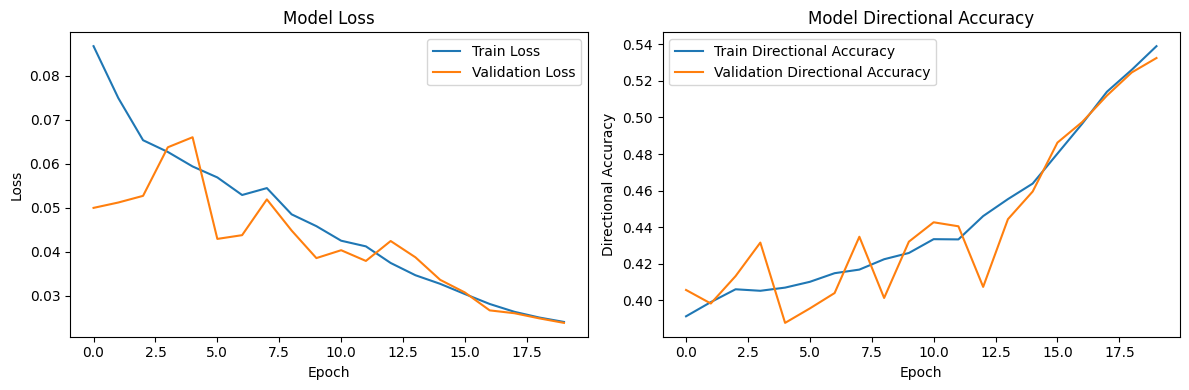

In [ ]:
from sklearn.metrics import r2_score

# Evaluate the model
model.load_weights("transformer_val_model.keras")
test_loss, test_accuracy = model.evaluate(test_sequences, test_labels)
print(f"Test accuracy: {test_accuracy}")

# Make predictions
predictions = model.predict(test_sequences)

# Calculate R-squared
r2 = r2_score(test_labels[:, 1], predictions[:, 0])
print(f"R-squared: {r2}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['dir_acc'], label='Train Directional Accuracy')
plt.plot(history.history['val_dir_acc'], label='Validation Directional Accuracy')
plt.title('Model Directional Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Directional Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
model = tf.keras.models.load_model("transformer_val_model.keras", custom_objects={'custom_mae_loss': custom_mae_loss, 'dir_acc': dir_acc})
fine_tune_epochs = 20
history_fine_tune = model.fit(
    train_sequences,
    train_labels,
    validation_data=(validation_sequences, validation_labels),
    epochs=fine_tune_epochs,
    batch_size=BATCH_SIZE, # Use the same batch size as before
    shuffle=True,
    callbacks=[
        checkpoint_callback_train, # Update the best model if improved
        get_lr_callback(batch_size=BATCH_SIZE, epochs=fine_tune_epochs), # Adjust learning rate if needed
        early_stopping # Prevent overfitting
    ]
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Epoch 1: LearningRateScheduler setting learning rate to 0.0001.
Epoch 1/20
739/740 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - dir_acc: 0.5393 - loss: 0.0240
Epoch 1: dir_acc improved from 0.53889 to 0.54046, saving model to transformer_train_model.keras
740/740 ━━━━━━━━━━━━━━━━━━━━ 43s 20ms/step - dir_acc: 0.5393 - loss: 0.0240 - val_dir_acc: 0.5291 - val_loss: 0.0242 - learning_rate: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0009166666666666666.
Epoch 2/20
737/740 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - dir_acc: 0.5009 - loss: 0.0282
Epoch 2: dir_acc did not improve from 0.54046
740/740 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - dir_acc: 0.5009 - loss: 0.0282 - val_dir_acc: 0.5163 - val_loss: 0.0262 - learning_rate: 9.1667e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0017333333333333333.
Epoch 3/20
737/740 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - dir_acc: 0.4801 - loss: 0.0322
Epoch 3: dir_acc did not improve from 0.54046
740/740 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/

185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - dir_acc: 0.5410 - loss: 0.0238
Test accuracy: 0.5383446216583252
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
R-squared: 0.9988499240429426


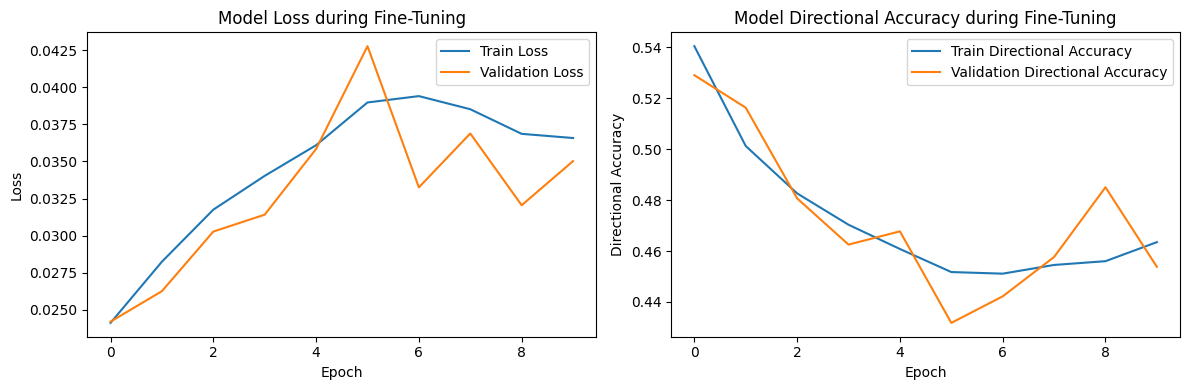

In [ ]:
# Save the fine-tuned model
model.save("transformer_finetuned_model.keras")

# Load the fine-tuned model
model = tf.keras.models.load_model("transformer_finetuned_model.keras", custom_objects={'custom_mae_loss': custom_mae_loss, 'dir_acc': dir_acc})

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_sequences, test_labels)
print(f"Test accuracy: {test_accuracy}")

# Make predictions on the test set
predictions = model.predict(test_sequences)

# Calculate R-squared
r2 = r2_score(test_labels[:, 1], predictions[:, 0])
print(f"R-squared: {r2}")

# Plot training history
plt.figure(figsize=(12, 4))

# Plot the fine-tuning training history
plt.subplot(1, 2, 1)
plt.plot(history_fine_tune.history['loss'], label='Train Loss')
plt.plot(history_fine_tune.history['val_loss'], label='Validation Loss')
plt.title('Model Loss during Fine-Tuning')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_fine_tune.history['dir_acc'], label='Train Directional Accuracy')
plt.plot(history_fine_tune.history['val_dir_acc'], label='Validation Directional Accuracy')
plt.title('Model Directional Accuracy during Fine-Tuning')
plt.xlabel('Epoch')
plt.ylabel('Directional Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Fine tuned transformer for recommendation system.

In [ ]:
import pandas as pd
import numpy as np
import talib as ta
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add, GlobalAveragePooling1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


### preprocessing

In [ ]:
# Enable mixed precision
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Load and preprocess data
data = pd.read_csv('/content/xnas-itch-20230703.tbbo (1).csv')
data['price'] = data['price'] / 1e9
data['bid_px_00'] = data['bid_px_00'] / 1e9
data['ask_px_00'] = data['ask_px_00'] / 1e9
data['Close'] = data['price']
data['Volume'] = data['size']
data['High'] = data[['bid_px_00', 'ask_px_00']].max(axis=1)
data['Low'] = data[['bid_px_00', 'ask_px_00']].min(axis=1)
data['Open'] = data['Close'].shift(1).fillna(data['Close'])

# Define a class to add technical indicators
class TechnicalIndicators:
    def __init__(self, data):
        self.data = data

    def add_momentum_indicators(self):
        self.data['RSI'] = ta.RSI(self.data['Close'], timeperiod=14)
        self.data['MACD'], self.data['MACD_signal'], self.data['MACD_hist'] = ta.MACD(self.data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
        self.data['Stoch_k'], self.data['Stoch_d'] = ta.STOCH(self.data['High'], self.data['Low'], self.data['Close'], fastk_period=14, slowk_period=3, slowd_period=3)

    def add_volume_indicators(self):
        self.data['OBV'] = ta.OBV(self.data['Close'], self.data['Volume'])

    def add_volatility_indicators(self):
        self.data['Upper_BB'], self.data['Middle_BB'], self.data['Lower_BB'] = ta.BBANDS(self.data['Close'], timeperiod=20)
        self.data['ATR_1'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=1)
        self.data['ATR_2'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=2)
        self.data['ATR_5'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=5)
        self.data['ATR_10'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=10)
        self.data['ATR_20'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=20)

    def add_trend_indicators(self):
        self.data['ADX'] = ta.ADX(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=14)
        self.data['+DI'] = ta.PLUS_DI(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=14)
        self.data['-DI'] = ta.MINUS_DI(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=14)
        self.data['CCI'] = ta.CCI(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=5)

    def add_other_indicators(self):
        self.data['DLR'] = np.log(self.data['Close'] / self.data['Close'].shift(1))
        self.data['TWAP'] = self.data['Close'].expanding().mean()
        self.data['VWAP'] = (self.data['Volume'] * (self.data['High'] + self.data['Low']) / 2).cumsum() / self.data['Volume'].cumsum()

    def add_all_indicators(self):
        self.add_momentum_indicators()
        self.add_volume_indicators()
        self.add_volatility_indicators()
        self.add_trend_indicators()
        self.add_other_indicators()
        return self.data

# Add indicators to the data
ti = TechnicalIndicators(data)
df_with_indicators = ti.add_all_indicators()

# Handle infinite values and drop rows with NaNs
df_with_indicators.replace([np.inf, -np.inf], np.nan, inplace=True)
df_with_indicators.dropna(inplace=True)

# Define the features and labels
features = df_with_indicators[['Close', 'Volume', 'High', 'Low', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'Stoch_k', 'Stoch_d', 'OBV', 'Upper_BB', 'Middle_BB', 'Lower_BB', 'ATR_1', 'ATR_2', 'ATR_5', 'ATR_10', 'ATR_20', 'ADX', '+DI', '-DI', 'CCI', 'DLR', 'TWAP', 'VWAP']]


# Normalize the features
mean = features.mean()
std = features.std()
features_normalized = (features - mean) / std


### create squence for 2 hours and 5 min  intervals

In [ ]:
# Define the labels
labels = df_with_indicators[['RSI']].copy()

# Create sequences and labels
def create_sequences(data, labels, sequence_length=SEQUENCE_LEN):
    sequences = []
    lab = []
    data_size = len(data)

    for i in range(data_size - sequence_length):
        seq = data.iloc[i:i + sequence_length].values
        label = labels.iloc[i + sequence_length]

        if label['RSI'] < 30:
            signal = [1, 0, 0]  # Buy
        elif label['RSI'] > 70:
            signal = [0, 1, 0]  # Sell
        else:
            signal = [0, 0, 1]  # Hold

        sequences.append(seq)
        lab.append(signal)

    return np.array(sequences), np.array(lab)

SEQUENCE_LEN = 24  # Define sequence length as needed

# Generate sequences
all_sequences, all_labels = create_sequences(
    features_normalized,
    labels,
    sequence_length=SEQUENCE_LEN
)

### SPlit data to train,val and test set

In [ ]:
# Shuffle and split the data
np.random.seed(42)
shuffled_indices = np.random.permutation(len(all_sequences))
all_sequences = all_sequences[shuffled_indices]
all_labels = all_labels[shuffled_indices]

train_size = int(len(all_sequences) * 0.8)
val_size = int(len(all_sequences) * 0.1)

train_sequences = all_sequences[:train_size]
train_labels = all_labels[:train_size]

validation_sequences = all_sequences[train_size:train_size+val_size]
validation_labels = all_labels[train_size:train_size+val_size]

test_sequences = all_sequences[train_size+val_size:]
test_labels = all_labels[train_size+val_size:]

### Create Transformer model

In [ ]:
# Define the Transformer model
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Add()([x, inputs])

    y = LayerNormalization(epsilon=1e-6)(x)
    y = Dense(ff_dim, activation="relu")(y)
    y = Dropout(dropout)(y)
    y = Dense(inputs.shape[-1])(y)
    return Add()([y, x])

def build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_layers, dropout=0):
    inputs = Input(shape=input_shape)
    x = inputs
    for _ in range(num_layers):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
    x = GlobalAveragePooling1D()(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    outputs = Dense(3, activation="softmax")(x)  # Change to 3 outputs with softmax activation
    return Model(inputs=inputs, outputs=outputs)

# Set model parameters
input_shape = train_sequences.shape[1:]
head_size = 256
num_heads = 16
ff_dim = 1024
num_layers = 12
dropout = 0.20

model = build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_layers, dropout)
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 24, 26)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_25    │ (None, 24, 26)         │             52 │ input_layer_1[0][0]    │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_12   │ (None, 24, 26)         │        438,298 │ layer_normalization_2… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_24 (Add)              │ (None, 24, 26)         │              0 │ multi_head_attention_… │
│                           │                        │                │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_26    │ (None, 24, 26)         │             52 │ add_24[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_25 (Dense)          │ (None, 24, 1024)       │         27,648 │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_25 (Dropout)      │ (None, 24, 1024)       │              0 │ dense_25[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_26 (Dense)          │ (None, 24, 26)         │         26,650 │ dropout_25[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_25 (Add)              │ (None, 24, 26)         │              0 │ dense_26[0][0],        │
│                           │                        │                │ add_24[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_27    │ (None, 24, 26)         │             52 │ add_25[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_13   │ (None, 24, 26)         │        438,298 │ layer_normalization_2… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_26 (Add)              │ (None, 24, 26)         │              0 │ multi_head_attention_… │
│                           │                        │                │ add_25[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_28    │ (None, 24, 26)         │             52 │ add_26[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_27 (Dense)          │ (None, 24, 1024)       │         27,648 │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_27 (Dropout) 

 Total params: 5,912,533 (22.55 MB)

 Trainable params: 5,912,533 (22.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss=CategoricalCrossentropy(),
    metrics=[CategoricalAccuracy(name="accuracy")]
)

# Callbacks
checkpoint_callback = ModelCheckpoint(
    "transformer_model.keras",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1,
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

def get_lr_callback(batch_size=16, mode='cos', epochs=100, plot=False):
    lr_start, lr_max, lr_min = 0.0001, 0.005, 0.00001
    lr_ramp_ep = int(0.30 * epochs)
    lr_sus_ep = max(0, int(0.10 * epochs) - lr_ramp_ep)

    def lrfn(epoch):
        if epoch < lr_ramp_ep:
            lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start
        elif epoch < lr_ramp_ep + lr_sus_ep:
            lr = lr_max
        elif mode == 'cos':
            decay_total_epochs, decay_epoch_index = epochs - lr_ramp_ep - lr_sus_ep, epoch - lr_ramp_ep - lr_sus_ep
            phase = np.pi * decay_epoch_index / decay_total_epochs
            lr = (lr_max - lr_min) * 0.5 * (1 + np.cos(phase)) + lr_min
        else:
            lr = lr_min

        return lr

    if plot:
        plt.figure(figsize=(10, 5))
        plt.plot(np.arange(epochs), [lrfn(epoch) for epoch in np.arange(epochs)], marker='o')
        plt.xlabel('Epoch')
        plt.ylabel('Learning Rate')
        plt.title('Learning Rate Scheduler')
        plt.show()

    return tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)



### Train the model

In [ ]:
# Train the model
BATCH_SIZE = 64
EPOCHS = 100

history = model.fit(
    train_sequences,
    train_labels,
    validation_data=(validation_sequences, validation_labels),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    shuffle=True,
    callbacks=[
        checkpoint_callback,
        get_lr_callback(batch_size=BATCH_SIZE, epochs=EPOCHS),
        early_stopping
    ]
)




Epoch 1: LearningRateScheduler setting learning rate to 0.0001.
Epoch 1/100
741/741 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.6875 - loss: 0.6873
Epoch 1: val_accuracy improved from -inf to 0.80628, saving model to transformer_model.keras
741/741 ━━━━━━━━━━━━━━━━━━━━ 164s 134ms/step - accuracy: 0.6875 - loss: 0.6872 - val_accuracy: 0.8063 - val_loss: 0.4645 - learning_rate: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.00026333333333333336.
Epoch 2/100
740/741 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8002 - loss: 0.4753
Epoch 2: val_accuracy improved from 0.80628 to 0.83685, saving model to transformer_model.keras
741/741 ━━━━━━━━━━━━━━━━━━━━ 61s 82ms/step - accuracy: 0.8002 - loss: 0.4752 - val_accuracy: 0.8369 - val_loss: 0.4120 - learning_rate: 2.6333e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.00042666666666666667.
Epoch 3/100
740/741 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8327 - loss: 0.4132
Epoch 3: val_accuracy i

### Evaluation the model

186/186 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8903 - loss: 0.3192
Test accuracy: 0.8872002959251404
186/186 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
Confusion Matrix:
[[1499    5  157]
 [   3 1081  206]
 [ 163  134 2674]]

Classification Report:
              precision    recall  f1-score   support

         Buy       0.90      0.90      0.90      1661
        Sell       0.89      0.84      0.86      1290
        Hold       0.88      0.90      0.89      2971

    accuracy                           0.89      5922
   macro avg       0.89      0.88      0.88      5922
weighted avg       0.89      0.89      0.89      5922



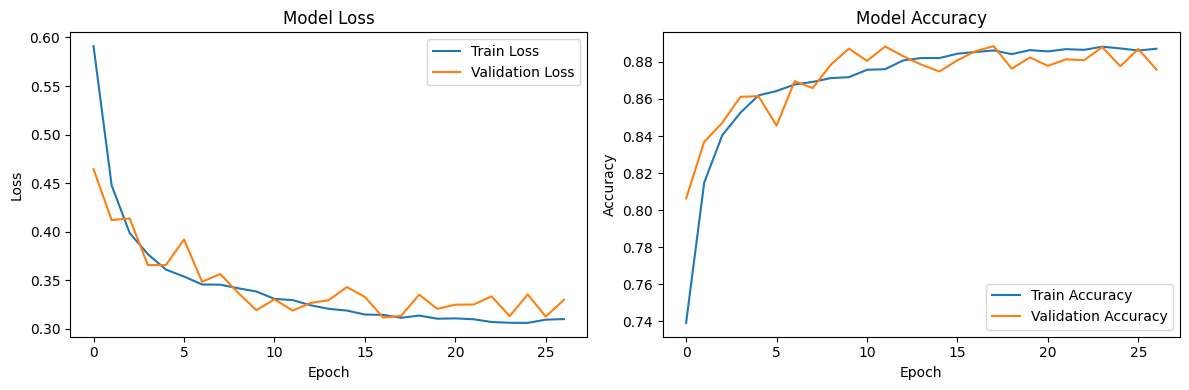

In [ ]:
# Evaluate the model
model.load_weights("transformer_model.keras")
test_loss, test_accuracy = model.evaluate(test_sequences, test_labels)
print(f"Test accuracy: {test_accuracy}")

# Make predictions
predictions = model.predict(test_sequences)

# Convert predictions to signal labels
signal_labels = ["Buy", "Sell", "Hold"]
predicted_signals = [signal_labels[np.argmax(pred)] for pred in predictions]
true_signals = [signal_labels[np.argmax(true)] for true in test_labels]

# Calculate confusion matrix
cm = confusion_matrix(true_signals, predicted_signals, labels=signal_labels)
print("Confusion Matrix:")
print(cm)

# Print classification report
print("\nClassification Report:")
print(classification_report(true_signals, predicted_signals, labels=signal_labels))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()